In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


/Users/tugrul/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_csv('results_mixed.csv')
#df = df.sort_values(by=['publisher_number', 'subscriber_number', 'message_size'])

# Convert message_size
df['message_size'] = df['message_size'].map({1024: 1, 2048: 2, 4096: 4, 8192: 8, 16384: 16})

# Convert ram_usage and database_size to kilobytes
df['ram_usage'] = df['ram_usage'] / 1024
df['database_size'] = df['database_size'] / 1024

In [10]:
print(df['publisher_number'].unique())
print(df['subscriber_number'].unique())
print(df['message_size'].unique())

[ 1  4  5 64  8 32 16  6  2  3  7]
[32  1  7  6  8 16 64  3  4  5  2]
[ 8 16  2  4  1]


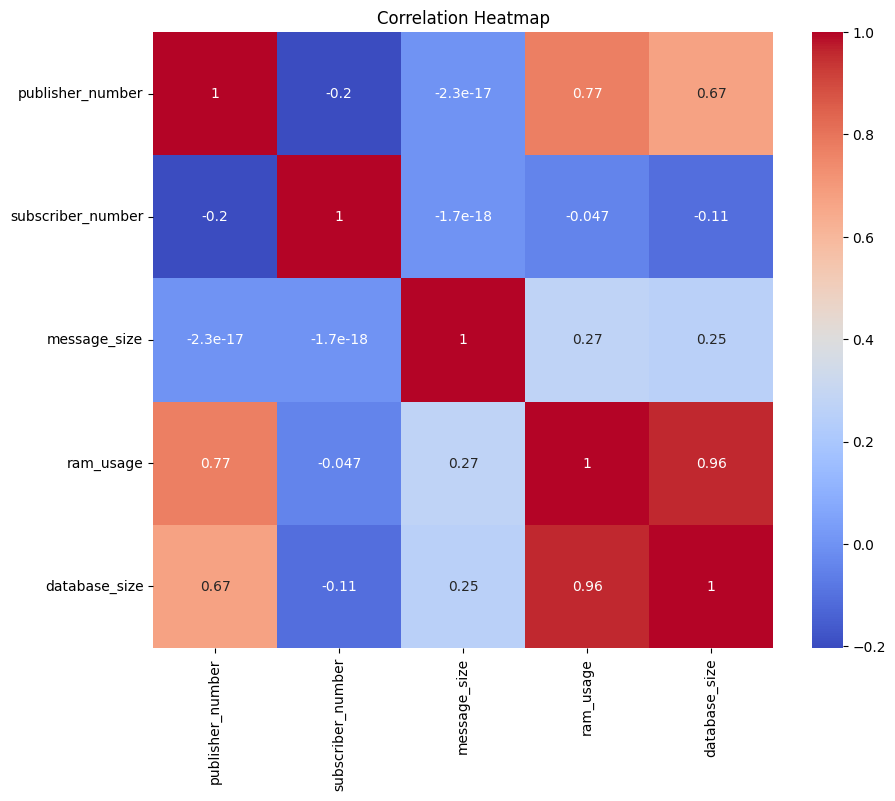

In [3]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


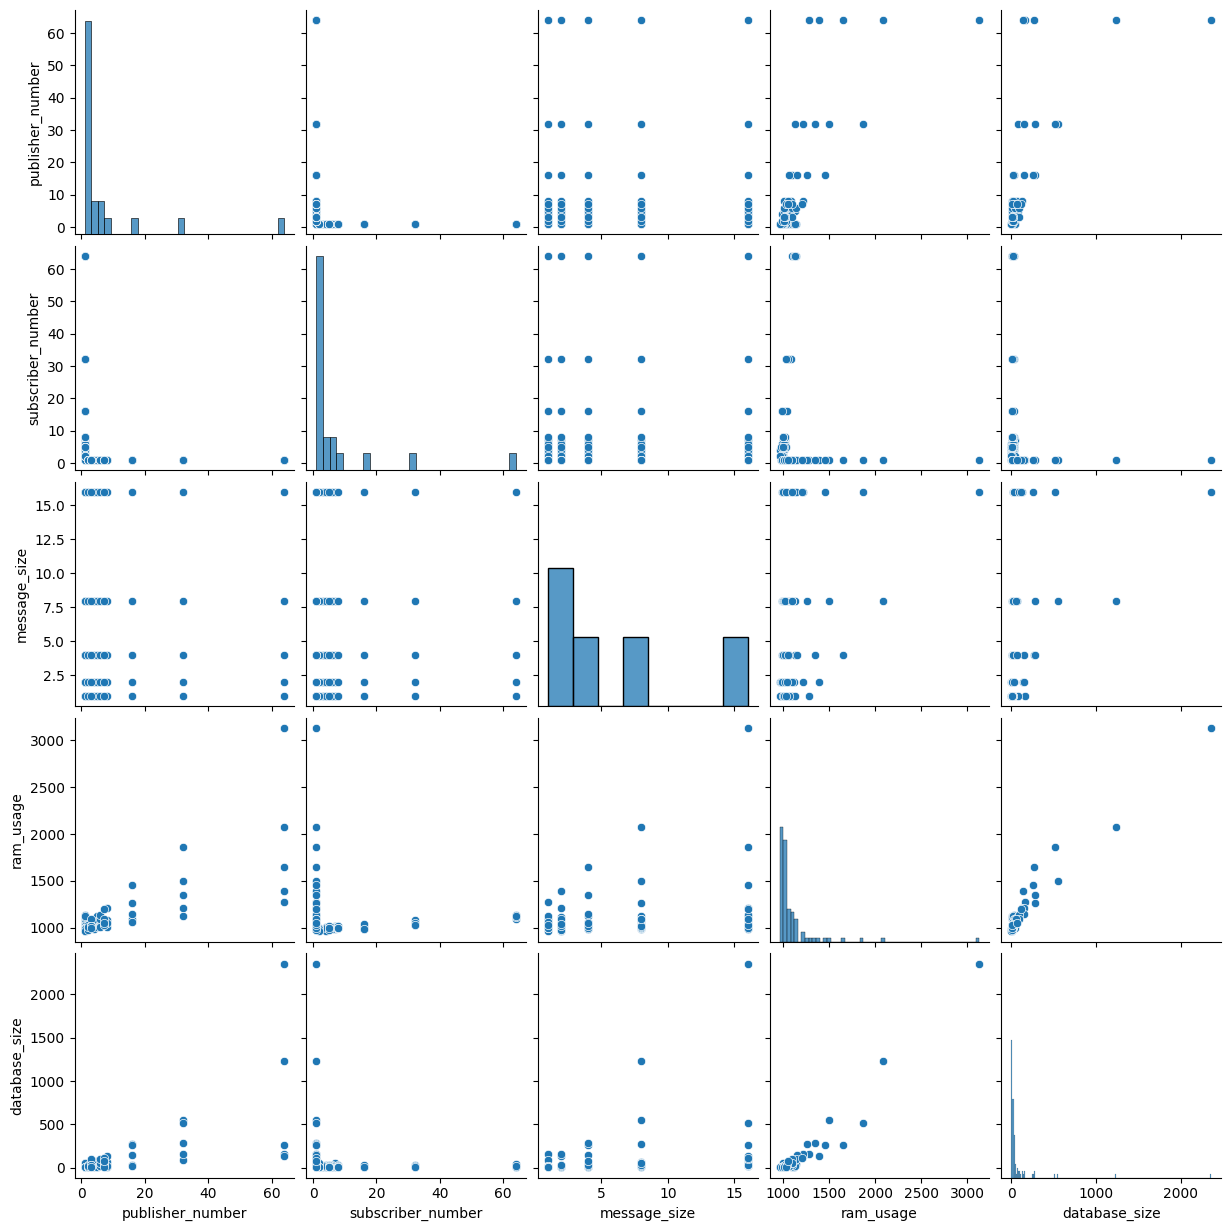

In [4]:
sns.pairplot(df)
plt.show()


In [5]:
# Split the data into training and testing sets
X = df[['publisher_number', 'subscriber_number', 'message_size']]
y = df['database_size']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 5077.876616354105
R^2 Score: -0.4344975407184313


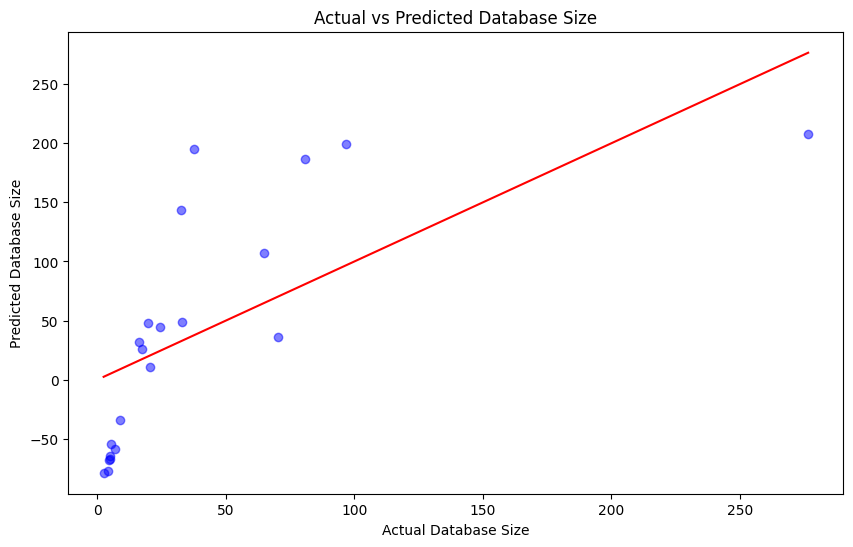

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Database Size')
plt.ylabel('Predicted Database Size')
plt.title('Actual vs Predicted Database Size')
plt.show()


In [7]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Split the data into training and testing sets
X = df[['publisher_number', 'subscriber_number', 'message_size']]
y = df['database_size']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set with both models
rf_y_pred = rf_model.predict(X_test)
gb_y_pred = gb_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the models
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f'Random Forest - Mean Squared Error: {rf_mse}, R^2 Score: {rf_r2}')
print(f'Gradient Boosting - Mean Squared Error: {gb_mse}, R^2 Score: {gb_r2}')
print(f'XGBoost - Mean Squared Error: {xgb_mse}, R^2 Score: {xgb_r2}')


Random Forest - Mean Squared Error: 1116.7334952380936, R^2 Score: 0.6845233601388412
Gradient Boosting - Mean Squared Error: 446.2566837546156, R^2 Score: 0.8739327156328609
XGBoost - Mean Squared Error: 139.34282399974094, R^2 Score: 0.9606357236604328


In [8]:
# Normalize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1))

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

# Predict on the test set
nn_y_pred = nn_model.predict(X_test_scaled).flatten()

# Evaluate the model
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)

print(f'Neural Network - Mean Squared Error: {nn_mse}, R^2 Score: {nn_r2}')


/Users/tugrul/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Neural Network - Mean Squared Error: 1064.3135590800466, R^2 Score: 0.699331965228054


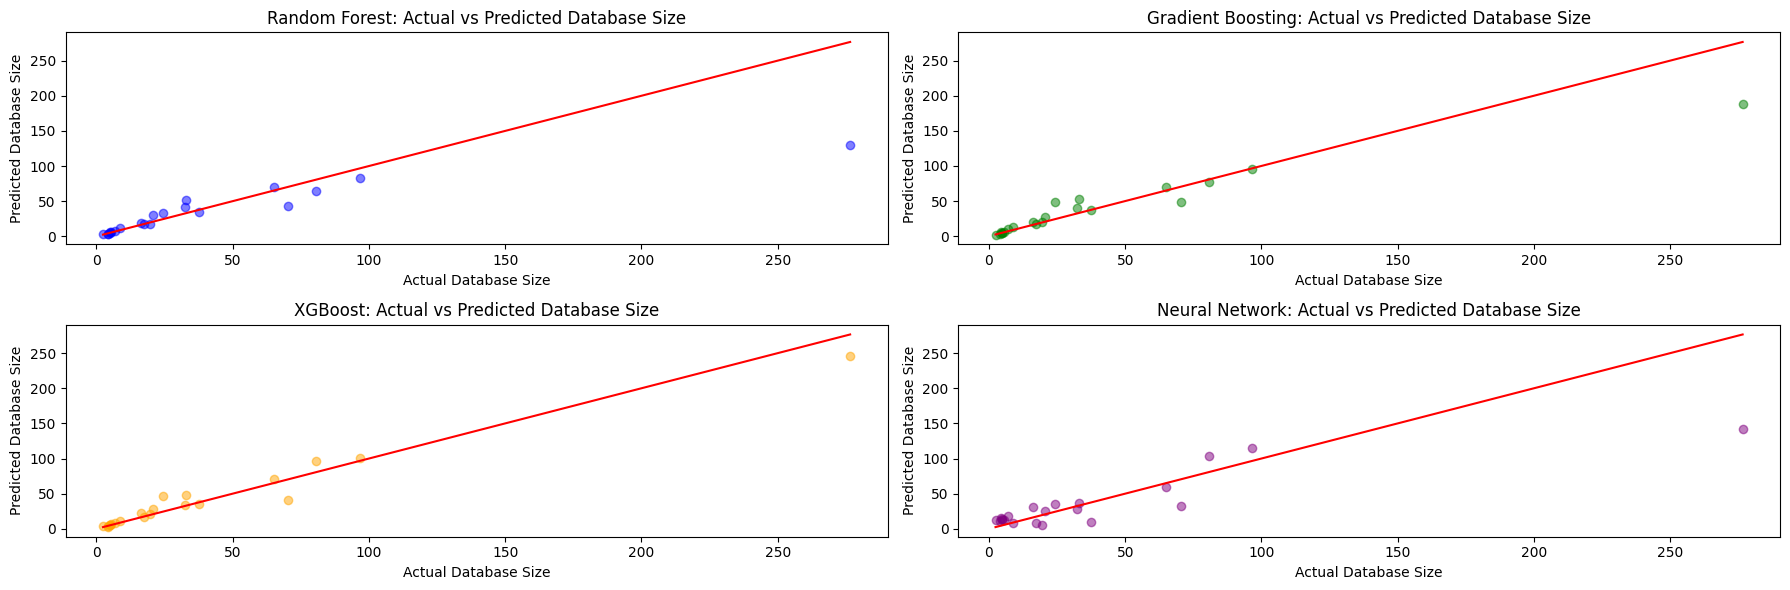

In [9]:
plt.figure(figsize=(18, 6))

# Random Forest
plt.subplot(2, 2, 1)
plt.scatter(y_test, rf_y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Database Size')
plt.ylabel('Predicted Database Size')
plt.title('Random Forest: Actual vs Predicted Database Size')

# Gradient Boosting
plt.subplot(2, 2, 2)
plt.scatter(y_test, gb_y_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Database Size')
plt.ylabel('Predicted Database Size')
plt.title('Gradient Boosting: Actual vs Predicted Database Size')

# XGBoost
plt.subplot(2, 2, 3)
plt.scatter(y_test, xgb_y_pred, color='orange', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Database Size')
plt.ylabel('Predicted Database Size')
plt.title('XGBoost: Actual vs Predicted Database Size')

# Neural Network
plt.subplot(2, 2, 4)
plt.scatter(y_test, nn_y_pred, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Database Size')
plt.ylabel('Predicted Database Size')
plt.title('Neural Network: Actual vs Predicted Database Size')

plt.tight_layout()
plt.show()


In [17]:
import itertools
import pandas as pd

# Define the values for each input
publisher_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64]
subscriber_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64]
message_sizes = [1, 2, 4, 8, 16]

# Generate all combinations of the inputs
combinations = list(itertools.product(publisher_numbers, subscriber_numbers, message_sizes))

# Create a DataFrame from the combinations
input_data = pd.DataFrame(combinations, columns=['publisher_number', 'subscriber_number', 'message_size'])

# Predict database sizes for the combinations using XGBoost
input_data['predicted_database_size'] = xgb_model.predict(input_data)

# Display the catalog
display(input_data)

# Optionally, save the catalog to a CSV file
input_data.to_csv('xgboost_combinations_catalog.csv', index=False)


,publisher_number,subscriber_number,message_size,predicted_database_size
0,1,1,1,1.879090
1,1,1,2,3.701714
2,1,1,4,8.462646
3,1,1,8,13.072966
4,1,1,16,21.706194
...,...,...,...,...
600,64,64,1,160.245117
601,64,64,2,135.123398
602,64,64,4,263.047455
603,64,64,8,1225.459839


In [18]:
combinations

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 4),
 (1, 1, 8),
 (1, 1, 16),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 4),
 (1, 2, 8),
 (1, 2, 16),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 4),
 (1, 3, 8),
 (1, 3, 16),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 4),
 (1, 4, 8),
 (1, 4, 16),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 4),
 (1, 5, 8),
 (1, 5, 16),
 (1, 6, 1),
 (1, 6, 2),
 (1, 6, 4),
 (1, 6, 8),
 (1, 6, 16),
 (1, 7, 1),
 (1, 7, 2),
 (1, 7, 4),
 (1, 7, 8),
 (1, 7, 16),
 (1, 8, 1),
 (1, 8, 2),
 (1, 8, 4),
 (1, 8, 8),
 (1, 8, 16),
 (1, 16, 1),
 (1, 16, 2),
 (1, 16, 4),
 (1, 16, 8),
 (1, 16, 16),
 (1, 32, 1),
 (1, 32, 2),
 (1, 32, 4),
 (1, 32, 8),
 (1, 32, 16),
 (1, 64, 1),
 (1, 64, 2),
 (1, 64, 4),
 (1, 64, 8),
 (1, 64, 16),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 4),
 (2, 1, 8),
 (2, 1, 16),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 4),
 (2, 2, 8),
 (2, 2, 16),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 4),
 (2, 3, 8),
 (2, 3, 16),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 4),
 (2, 4, 8),
 (2, 4, 16),
 (2, 5, 1),
 (2, 5, 2),
 (2, 5, 4),
 (2, 5, 8),
 (2, 5, 16),
 (2, 6, 1